In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\T Gushpu\dataset_Assignment-1_ML.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


# ABOUT THE DATASET:

**Brand Name**: The 'CarName' column can provide insights into the brand of the car, which can significantly affect its price. Some brands are known for their high-quality and luxury cars and can charge a premium price for their used cars. In contrast, lesser-known brands or brands associated with lower quality may have lower prices for their used cars.

**Technical Specifications**: Technical specifications such as engine size, horsepower, and fuel efficiency (citympg and highwaympg) can affect the pricing of used cars. These features can impact the performance and efficiency of the car, which can influence the price.

**Car Type**: The 'carbody' column can provide insights into the type of car, such as a sedan, coupe, or wagon. The car's body type can affect the car's utility and appeal, which can impact its price.

**Fuel Type and Fuel System**: The 'fueltype' and 'fuelsystem' columns can provide insights into the type of fuel and fuel system used by the car. Certain types of fuel and fuel systems can be more expensive or less efficient than others, which can impact the car's price.

**Car Condition**: The 'curbweight' column can provide insights into the car's weight, which can impact its performance and efficiency. Additionally, the car's overall condition, such as its age and mileage, can also affect its price.

# PROBLEM STATEMENT:

To understand the factors on which the pricing of used cars depends.  The company wants to know:

a.	Which variables are significant in predicting the price of a used car?

b.	How well those variables describe the price of a used car.

To build the model to predict or estimate the price of used cars with the available features. It will be used by the management to understand how exactly the prices vary with these features. They can accordingly apply the pricing strategy for their used cars.


# APPROACH TO THE SOLUTION

**a**. The variables that are significant in predicting the price of a used car can be identified through feature selection techniques such as correlation analysis, feature importance, and recursive feature elimination. 
    
   Some of the variables that may affect the price of used cars include the age of the car, mileage, brand, model, fuel type, engine size, transmission type, number of owners, service history, and condition of the car. 
    
   These variables may vary in their impact on the price of used cars depending on the market, so it is essential to consider the specific market (i.e., EU) when building the model.

**b**. To determine how well the variables describe the price of a used car, we can use metrics such as R-squared, mean absolute error (MAE), and mean squared error (MSE) to evaluate the performance of the regression model. 
    
   These metrics can help us understand how well the model fits the data and how accurate the predictions are. 
    
   Additionally, we can use cross-validation to evaluate the model's performance on different sets of data and ensure that the model is not overfitting to the training data.

In [4]:
df.shape

(205, 25)

205 - Rows and 25- Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        203 non-null    object 
 5   doornumber        202 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        198 non-null    object 
 8   wheelbase         202 non-null    float64
 9   carlength         202 non-null    float64
 10  carwidth          200 non-null    float64
 11  carheight         198 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    201 non-null    object 
 15  enginesize        199 non-null    float64
 16  fuelsystem        197 non-null    object 
 1

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             5
aspiration           2
doornumber           3
carbody              0
drivewheel           7
wheelbase            3
carlength            3
carwidth             5
carheight            7
curbweight           0
enginetype           0
cylindernumber       4
enginesize           6
fuelsystem           8
boreratio            4
stroke              10
compressionratio     4
horsepower           0
peakrpm              0
citympg             12
highwaympg           9
price                0
dtype: int64

# TREATING MISSING VALUES

FOR NUMERICAL

In [8]:
df['citympg'].fillna(df['citympg'].median(),inplace=True)
df['stroke'].fillna(df['stroke'].median(),inplace=True)
df['highwaympg'].fillna(df['highwaympg'].median(),inplace=True)
df['carheight'].fillna(df['carheight'].median(),inplace=True)
df['enginesize'].fillna(df['enginesize'].median(),inplace=True)
df['carwidth'].fillna(df['carwidth'].median(),inplace=True)
df['boreratio'].fillna(df['boreratio'].median(),inplace=True)
df['compressionratio'].fillna(df['compressionratio'].median(),inplace=True)
df['wheelbase'].fillna(df['wheelbase'].median(),inplace=True)
df['carlength'].fillna(df['carlength'].median(),inplace=True)


FOR CATAGORICAL

In [9]:
df['fuelsystem'] = df['fuelsystem'].fillna(df['fuelsystem'].mode()[0])
df['drivewheel'] = df['drivewheel'].fillna(df['drivewheel'].mode()[0])
df['fueltype'] = df['fueltype'].fillna(df['fueltype'].mode()[0])
df['cylindernumber'] = df['cylindernumber'].fillna(df['cylindernumber'].mode()[0])
df['doornumber'] = df['doornumber'].fillna(df['doornumber'].mode()[0])
df['aspiration'] = df['aspiration'].fillna(df['aspiration'].mode()[0])

In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Missing values are treated and can be used for building the model.

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,RobustScaler

In [12]:
df1 = df.copy()

In [13]:
le=LabelEncoder()
for i in ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']:
    df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,88.6,168.8,...,130.0,5,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,3,1,0,1,0,2,88.6,168.8,...,130.0,5,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,1,1,0,1,2,2,94.5,171.2,...,152.0,5,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,4,1,0,0,3,1,99.8,176.6,...,109.0,5,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,5,1,0,0,3,0,99.4,176.6,...,136.0,5,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


In [15]:
rs=RobustScaler()
sc=StandardScaler()
minmax=MinMaxScaler()
for i in ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']:
    df1[i]=minmax.fit_transform(df1[i].values.reshape(-1,1))

In [16]:
X=df1.drop('price',axis=1)
y=df1['price']

# MODEL BUILDING

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=35)

In [19]:
xtrain.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
38,39,0,41,1,0,1,2,1,0.288630,0.394030,...,2,0.184906,0,0.435714,0.719048,0.1250,0.158333,0.673469,0.411765,0.447368
64,65,0,53,1,0,0,2,1,0.355685,0.547761,...,2,0.230189,1,0.607143,0.628571,0.1000,0.150000,0.265306,0.382353,0.421053
146,147,0,110,1,0,0,4,1,0.303207,0.483582,...,2,0.177358,1,0.771429,0.271429,0.1250,0.141667,0.265306,0.441176,0.421053
96,97,1,76,1,0,0,3,1,0.230321,0.361194,...,2,0.135849,1,0.435714,0.580952,0.1500,0.087500,0.428571,0.529412,0.552632
36,37,0,42,1,0,0,4,1,0.288630,0.238806,...,2,0.116981,0,0.271429,0.638095,0.1375,0.116667,0.755102,0.500000,0.473684


In [20]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(164, 24)
xtest shape(41, 24)
ytrain shape(164,)
ytest shape(41,)


# Base Model

# Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dtreg=DecisionTreeRegressor()

In [23]:
dtreg.fit(xtrain,ytrain)

DecisionTreeRegressor()

To predict the model we take xtest and these xtest values will be compared to ytest values that is actual values,

We compare the ytest actual value of test data with ypredicted to model that has predicted the y values

In [24]:
ypred=dtreg.predict(xtest)
xtest.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,201,-1,139,1,0,0,3,2,0.655977,0.711940,...,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.294118,0.315789
133,134,2,103,1,0,0,3,1,0.364431,0.679104,...,2,0.226415,5,0.714286,0.476190,0.14375,0.258333,0.448980,0.235294,0.315789
181,182,-1,128,1,0,0,4,2,0.521866,0.697015,...,3,0.377358,5,0.521429,0.609524,0.13750,0.450000,0.428571,0.176471,0.210526
157,158,0,116,1,0,0,2,1,0.265306,0.376119,...,2,0.139623,1,0.464286,0.457143,0.12500,0.091667,0.265306,0.500000,0.552632
28,29,-1,33,1,0,0,4,1,0.486880,0.500000,...,2,0.222642,1,0.571429,0.661905,0.09375,0.166667,0.346939,0.323529,0.368421


To determine how well the variables describe the price of a used car

In [25]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [26]:
r2_score(ytest,ypred)

0.8653595695671916

In [27]:
mean_squared_error(ytest,ypred)

0.005242585890056708

In [28]:
mean_absolute_percentage_error(ytest,ypred)

0.2815138137017326

## INFERENCE

From the above result we conclude that r2_score is 86%  and Mean absolute percentage error is 28%

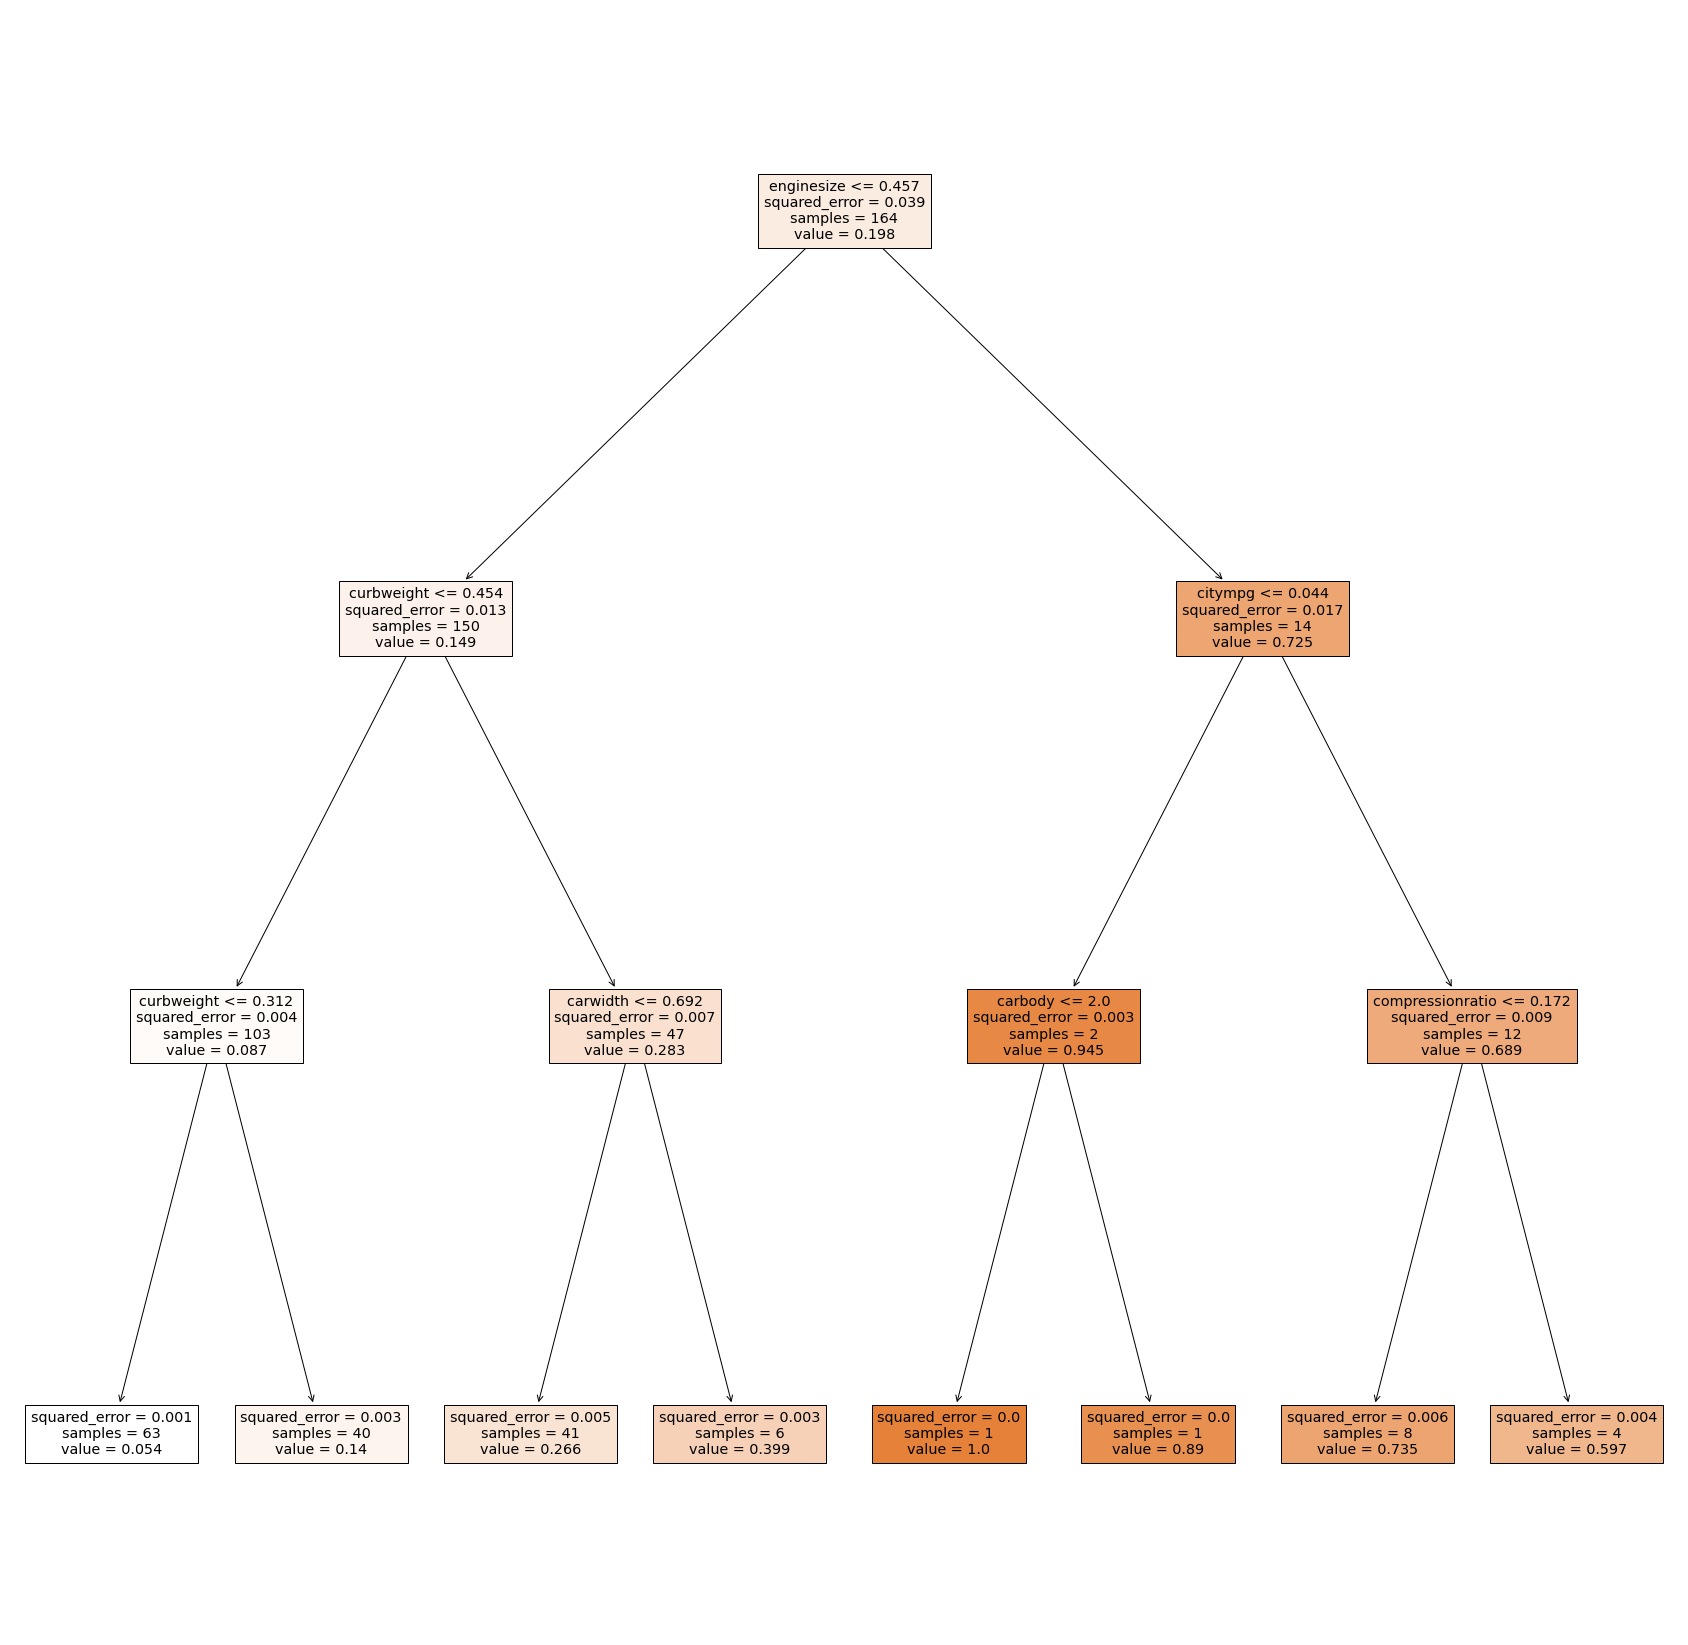

In [29]:
import matplotlib.pyplot as plt
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(xtrain,ytrain)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=list(xtrain.columns.values),class_names=['0','1'],filled=True);

In [30]:
feat_imp = dtreg.feature_importances_
pd.Series(feat_imp,index=list(xtrain.columns.values)).sort_values(ascending=False)

enginesize          0.673618
curbweight          0.228795
highwaympg          0.022190
carwidth            0.015003
car_ID              0.013219
compressionratio    0.010972
CarName             0.010273
stroke              0.005868
boreratio           0.004822
horsepower          0.004790
carlength           0.004135
carheight           0.003520
carbody             0.001136
citympg             0.000393
wheelbase           0.000340
doornumber          0.000315
peakrpm             0.000252
symboling           0.000231
drivewheel          0.000109
fuelsystem          0.000016
enginetype          0.000003
cylindernumber      0.000000
aspiration          0.000000
fueltype            0.000000
dtype: float64

# INSIGHT:

From the above result we conclude that enginesize has highest feature importance and rest follows. Hence the last three columns cylindernumber, aspiration and fueltype doesn't gave important for further building , thus we these columns to make effective and accurate.

# Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbr=GradientBoostingRegressor()

In [33]:
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [34]:
ypred=gbr.predict(xtest)

To determine how well the variables describe the price of a used car

In [35]:
r2_score(ytest,ypred)

0.955726387719001

In [36]:
mean_squared_error(ytest,ypred)

0.0017239117128494293

In [37]:
mean_absolute_percentage_error(ytest,ypred)

0.24571085199902204

# INFERENCE

From the above result we conclude that r2_score of gradientboostingregressor is 95% and meanabsolute percentage error is 24%

# HYPERPARAMETER TUNING - RandomizedSearchCV alogorithm for choosing best parameter which gives highest score.

In [38]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [39]:
mod=RandomizedSearchCV(gbr,{'n_estimators':[i for i in range(100,250,10)],'learning_rate':[0.1,0.2,0.3,0.4,0.5],'max_depth':range(3,12)},cv=15)

In [40]:
mod.fit(xtrain,ytrain)

RandomizedSearchCV(cv=15, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': range(3, 12),
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240]})

In [41]:
mod.best_score_

0.8854090039561814

In [42]:
mod.best_params_

{'n_estimators': 190, 'max_depth': 3, 'learning_rate': 0.2}

In [43]:
ypred1=mod.predict(xtest)

To determine how well the variables describe the price of a used car

In [55]:
r2_score(ytest,ypred1)

0.9528010706846886

In [56]:
mean_squared_error(ytest,ypred1)

0.0018378167691444033

In [57]:
mean_absolute_percentage_error(ytest,ypred1)

0.2645176758553896

# INFERENCE

From this result we conclude that r2_score of randomized search cv is 95% and mean absolute percentage error of 26%

# ADABOOST REGRESSOR - to build the decision tree with 1 depth

In [58]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
abr=AdaBoostRegressor(n_estimators=100)

In [60]:
abr.fit(xtrain,ytrain)

AdaBoostRegressor(n_estimators=100)

In [61]:
ypred_abr=abr.predict(xtest)

To determine how well the variables describe the price of a used car

In [62]:
r2_score(ytest,ypred_abr)

0.942604490363766

In [63]:
mean_squared_error(ytest,ypred_abr)

0.0022348479428079167

In [64]:
mean_absolute_percentage_error(ytest,ypred_abr)

0.44271555692885717

# INFERENCE 

From the above result we conclude that the Adaboost has the r2_score of 94% and mean absolute percentage error of 44%

# OVERALL INFERENCE

a)From the above results Enginesize(67%), curbweight(22%), highwaympg(22%), carwidth(15%), car_ID(13%), compressionratio and CarName has (10%) these are the variables that are significant in predicting the price of a used car can be identified through feature selection techniques such as correlation analysis, feature importance, and recursive feature elimination. 

b)Gradient Boosting regressor has highest r2_score and mean absolute percentage error is less.From feature importance column Enginesize plays major role in model prediction which is 67% that described from the price of 
the used cars.

To determine how well the variables describe the price of a used car, such as 

1)R-squared-95%, 

2)mean absolute error (MAE)-0.001, and 

3)mean squared error (MSE)-24% is the performance of the regression model.

